# Imports

In [74]:
# general

import torch
import json
from collections import Counter

# data
from datasets import Dataset, load_dataset
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
sns.set_theme(style="whitegrid", font='cmr10', font_scale=1.5)

In [76]:
SEED = 42

# Sub-task A

## TR - TS

In [77]:
path_to_train = 'subtaskA_train_monolingual.jsonl'

In [78]:
data = load_dataset("json", data_files=path_to_train, split='train')

In [79]:
data

Dataset({
    features: ['text', 'label', 'model', 'source', 'id'],
    num_rows: 119757
})

In [80]:
data = data.train_test_split(test_size=0.1, seed=SEED)

In [81]:
train = data['train']
train

Dataset({
    features: ['text', 'label', 'model', 'source', 'id'],
    num_rows: 107781
})

In [82]:
test = data['test']
test

Dataset({
    features: ['text', 'label', 'model', 'source', 'id'],
    num_rows: 11976
})

/tmp/ipykernel_265606/4007998366.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 1)
/tmp/ipykernel_265606/4007998366.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 2)


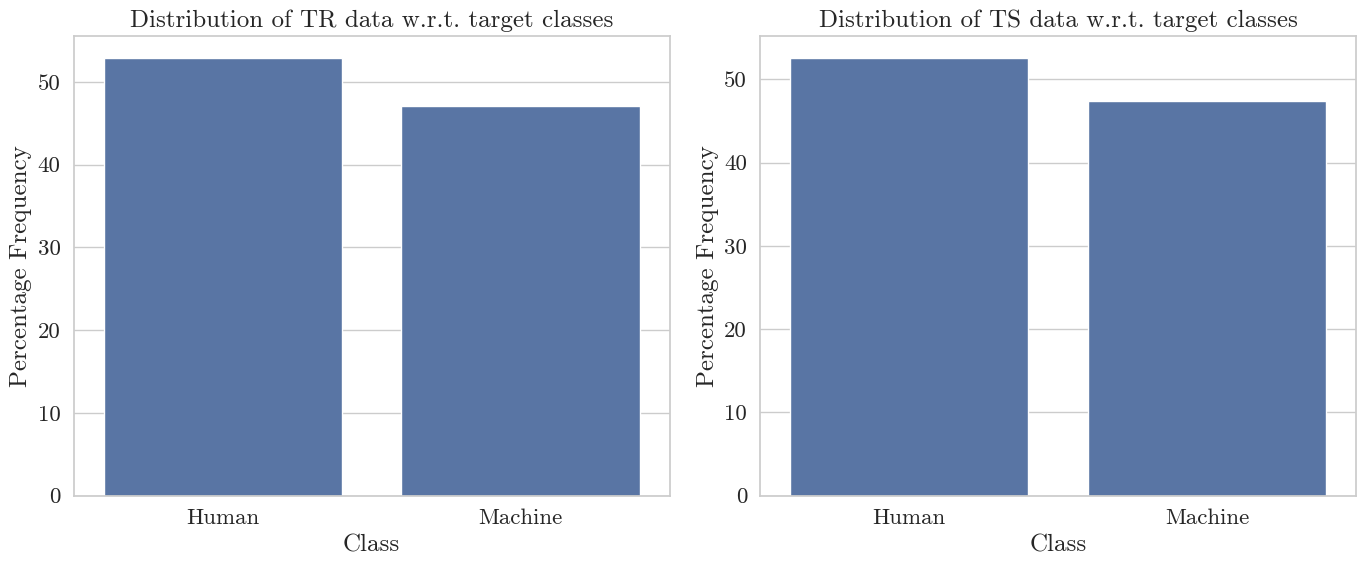

In [83]:
train_df = pd.DataFrame({'Class': train['label']})
test_df = pd.DataFrame({'Class': test['label']})
train_percentage_freq = train_df['Class'].value_counts(normalize=True) * 100
test_percentage_freq = test_df['Class'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=train_percentage_freq.index, y=train_percentage_freq)
plt.title('Distribution of TR data w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1], ['Human', 'Machine'])

plt.subplot(1, 2, 2)
sns.barplot(x=test_percentage_freq.index, y=test_percentage_freq)
plt.title('Distribution of TS data w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1], ['Human', 'Machine'])

plt.tight_layout()
plt.show()

/tmp/ipykernel_265606/3270935823.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 1)
/tmp/ipykernel_265606/3270935823.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 2)


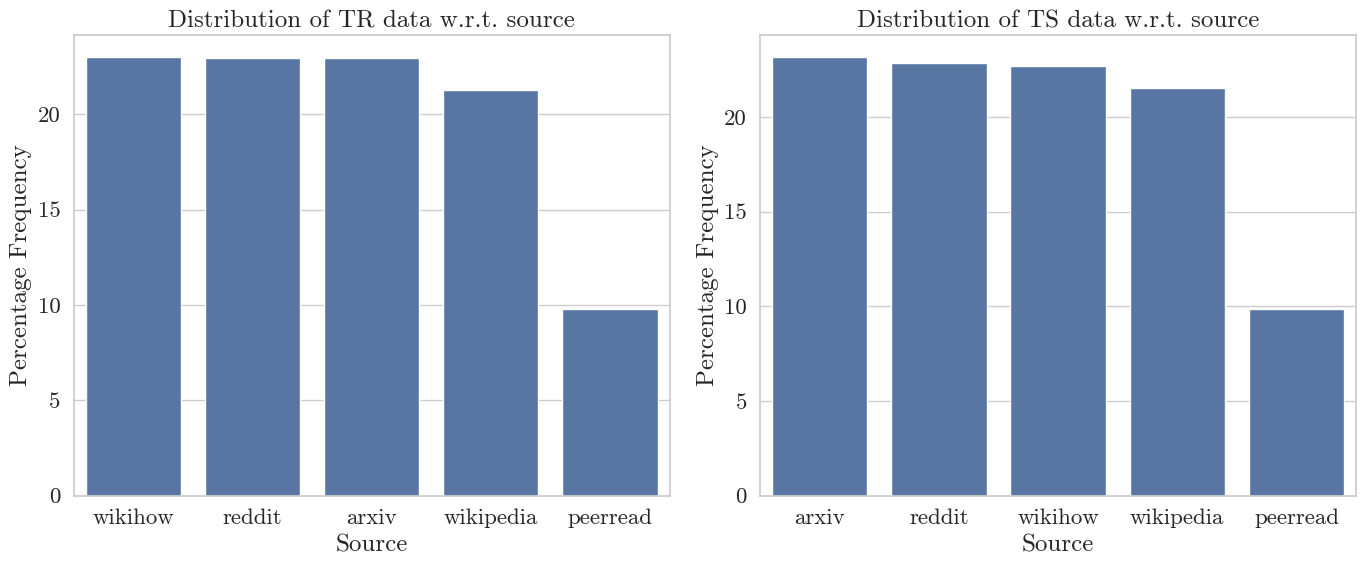

In [84]:
train_df = pd.DataFrame({'Source': train['source']})
test_df = pd.DataFrame({'Source': test['source']})
train_percentage_freq = train_df['Source'].value_counts(normalize=True) * 100
test_percentage_freq = test_df['Source'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=train_percentage_freq.index, y=train_percentage_freq)
plt.title('Distribution of TR data w.r.t. source')
plt.ylabel('Percentage Frequency')
plt.xlabel('Source')

plt.subplot(1, 2, 2)
sns.barplot(x=test_percentage_freq.index, y=test_percentage_freq)
plt.title('Distribution of TS data w.r.t. source')
plt.ylabel('Percentage Frequency')

plt.tight_layout()
plt.show()

In [11]:
test.to_json('subtaskA_test.jsonl')

Creating json from Arrow format:   0%|          | 0/12 [00:00<?, ?ba/s]

34417317

In [85]:
train = train.train_test_split(test_size=0.5, seed=SEED) # reducing TR size

In [86]:
train = train['train']
train

Dataset({
    features: ['text', 'label', 'model', 'source', 'id'],
    num_rows: 53890
})

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


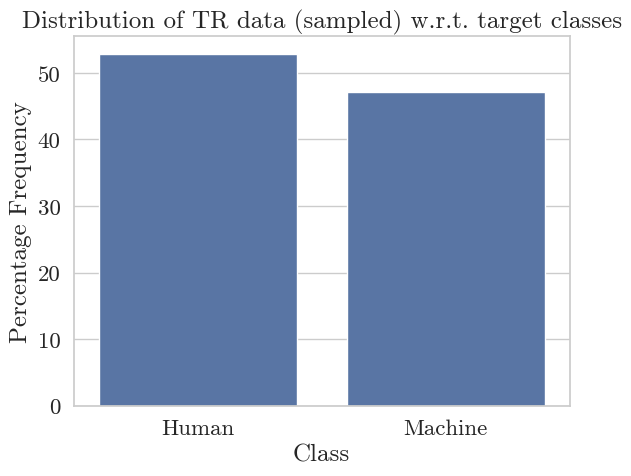

In [87]:
train_df = pd.DataFrame({'Class': train['label']})
train_percentage_freq = train_df['Class'].value_counts(normalize=True) * 100

sns.barplot(x=train_percentage_freq.index, y=train_percentage_freq)
plt.title('Distribution of TR data (sampled) w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1], ['Human', 'Machine'])
plt.show()

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


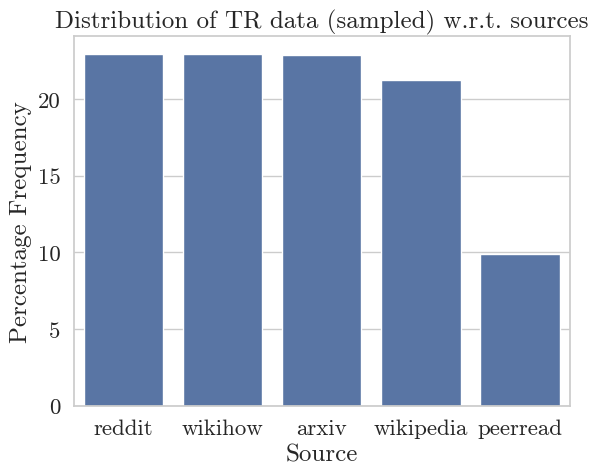

In [88]:
train_df = pd.DataFrame({'Source': train['source']})
train_percentage_freq = train_df['Source'].value_counts(normalize=True) * 100
sns.barplot(x=train_percentage_freq.index, y=train_percentage_freq)
plt.title('Distribution of TR data (sampled) w.r.t. sources')
plt.ylabel('Percentage Frequency')
plt.show()

In [16]:
train.to_json('subtaskA_train_sample.jsonl')

Creating json from Arrow format:   0%|          | 0/54 [00:00<?, ?ba/s]

157690642

## VL

In [66]:
path_to_val = 'subtaskA_dev_monolingual.jsonl'
val = load_dataset("json", data_files=path_to_val, split='train')

In [67]:
val

Dataset({
    features: ['text', 'label', 'model', 'source', 'id'],
    num_rows: 5000
})

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


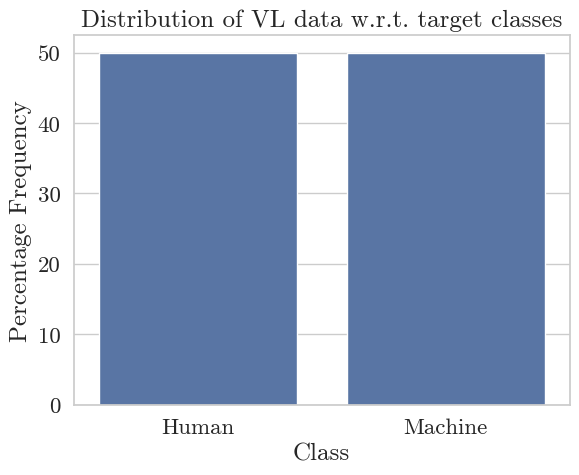

In [89]:
df = pd.DataFrame({'Class': val['label']})
percentage_freq = df['Class'].value_counts(normalize=True) * 100

sns.barplot(x=percentage_freq.index, y=percentage_freq)
plt.title('Distribution of VL data w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1], ['Human', 'Machine'])
plt.show()

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


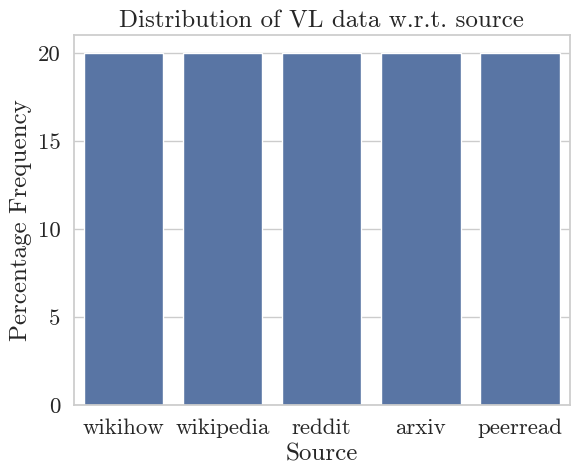

In [90]:
df = pd.DataFrame({'Source': val['source']})
percentage_freq = df['Source'].value_counts(normalize=True) * 100

sns.barplot(x=percentage_freq.index, y=percentage_freq)
plt.title('Distribution of VL data w.r.t. source')
plt.ylabel('Percentage Frequency')
plt.show()

# Sub-task B

## TR - TS

In [91]:
path_to_train = 'subtaskB_train.jsonl'

In [92]:
data = load_dataset("json", data_files=path_to_train, split='train')

In [93]:
data

Dataset({
    features: ['text', 'model', 'source', 'label', 'id'],
    num_rows: 71027
})

In [94]:
data = data.train_test_split(test_size=0.1, seed=SEED)

In [97]:
train = data['train']
train

Dataset({
    features: ['text', 'model', 'source', 'label', 'id'],
    num_rows: 63924
})

In [98]:
test = data['test']
test

Dataset({
    features: ['text', 'model', 'source', 'label', 'id'],
    num_rows: 7103
})

/tmp/ipykernel_265606/950451606.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 1)
/tmp/ipykernel_265606/950451606.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.subplot(1, 2, 2)


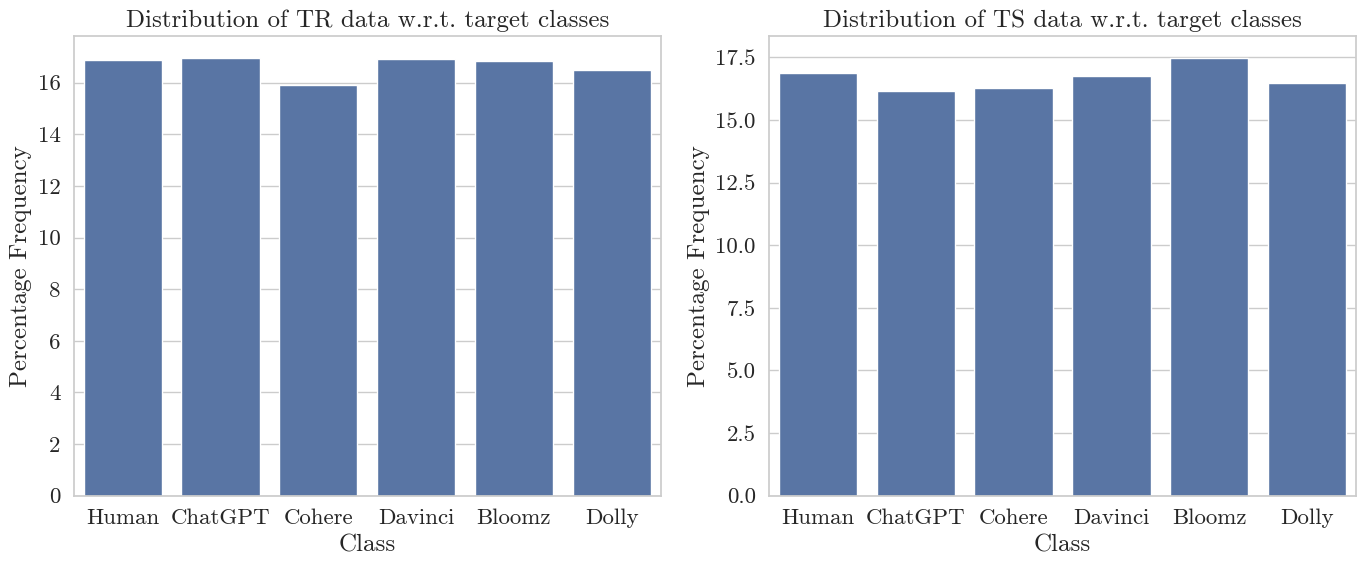

In [101]:
train_df = pd.DataFrame({'Class': train['label']})
test_df = pd.DataFrame({'Class': test['label']})
train_percentage_freq = train_df['Class'].value_counts(normalize=True) * 100
test_percentage_freq = test_df['Class'].value_counts(normalize=True) * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=train_percentage_freq.index, y=train_percentage_freq)
plt.title('Distribution of TR data w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1, 2, 3, 4, 5], ['Human', 'ChatGPT', 'Cohere', 'Davinci', 'Bloomz', 'Dolly'])

plt.subplot(1, 2, 2)
sns.barplot(x=test_percentage_freq.index, y=test_percentage_freq)
plt.title('Distribution of TS data w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1, 2, 3, 4, 5], ['Human', 'ChatGPT', 'Cohere', 'Davinci', 'Bloomz', 'Dolly'])

plt.tight_layout()
plt.show()

In [38]:
data['test'].to_json('subtaskB_test.jsonl')

Creating json from Arrow format:   0%|          | 0/8 [00:00<?, ?ba/s]

15758745

In [102]:
train = train.train_test_split(train_size=0.8, seed=42)

In [103]:
train = train['train']
train

Dataset({
    features: ['text', 'model', 'source', 'label', 'id'],
    num_rows: 51139
})

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


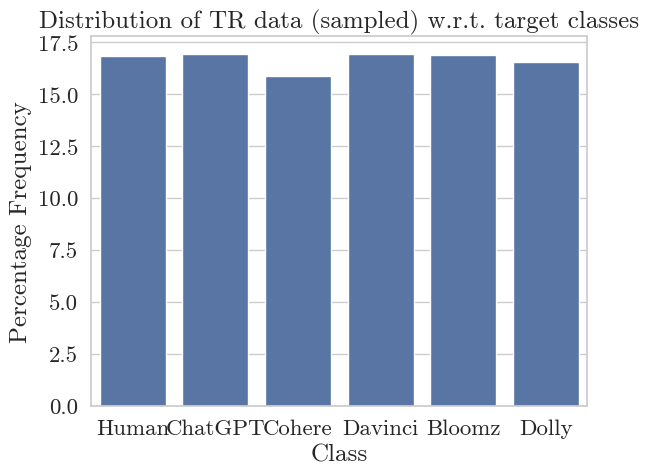

In [105]:
train_df = pd.DataFrame({'Class': train['label']})
train_percentage_freq = train_df['Class'].value_counts(normalize=True) * 100

sns.barplot(x=train_percentage_freq.index, y=train_percentage_freq)
plt.title('Distribution of TR data (sampled) w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1, 2, 3, 4, 5], ['Human', 'ChatGPT', 'Cohere', 'Davinci', 'Bloomz', 'Dolly'])
plt.show()

In [44]:
train.to_json('subtaskB_train_sample.jsonl')

Creating json from Arrow format:   0%|          | 0/52 [00:00<?, ?ba/s]

111385326

## VL

In [106]:
path_to_val = 'subtaskB_dev.jsonl'
val = load_dataset("json", data_files=path_to_val, split='train')

In [107]:
val

Dataset({
    features: ['text', 'model', 'source', 'label', 'id'],
    num_rows: 3000
})

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


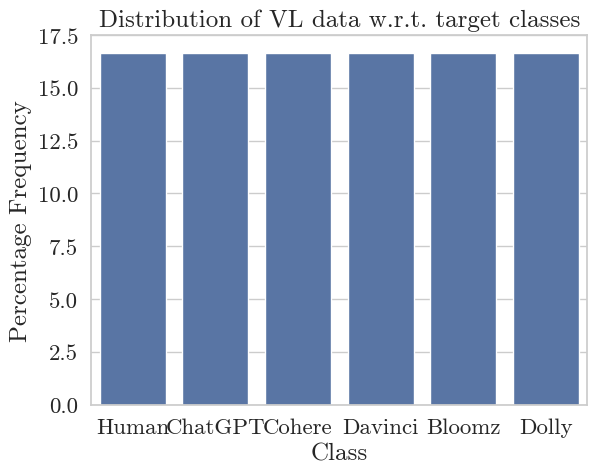

In [109]:
df = pd.DataFrame({'Class': val['label']})
percentage_freq = df['Class'].value_counts(normalize=True) * 100

sns.barplot(x=percentage_freq.index, y=percentage_freq)
plt.title('Distribution of VL data w.r.t. target classes')
plt.ylabel('Percentage Frequency')
plt.xticks([0, 1, 2, 3, 4, 5], ['Human', 'ChatGPT', 'Cohere', 'Davinci', 'Bloomz', 'Dolly'])
plt.show()

/home/g.fidone/hlt/lib/python3.10/site-packages/seaborn/categorical.py:2350: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


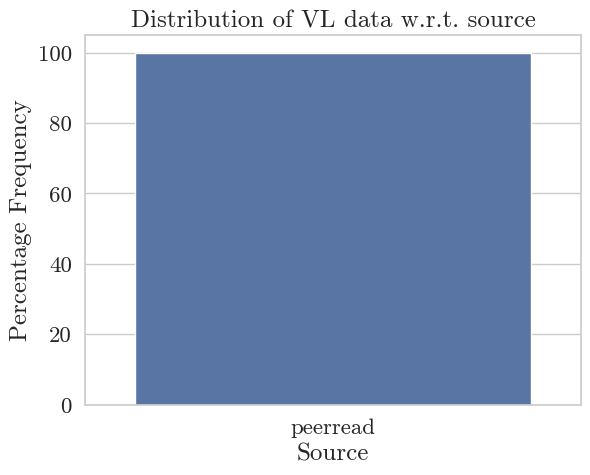

In [110]:
df = pd.DataFrame({'Source': val['source']})
percentage_freq = df['Source'].value_counts(normalize=True) * 100

sns.barplot(x=percentage_freq.index, y=percentage_freq)
plt.title('Distribution of VL data w.r.t. source')
plt.ylabel('Percentage Frequency')
plt.show()